In [144]:
import tensorflow as tf

In [145]:
print('Tensorflow Version: {}'.format(tf.__version__))

Tensorflow Version: 2.11.0


In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

加载fashion_mnist

In [147]:
(train_image, train_label), (test_image, test_label) = tf.keras.datasets.fashion_mnist.load_data()

In [148]:
train_image.shape

(60000, 28, 28)

In [149]:
train_label.shape

(60000,)

In [150]:
test_image.shape, test_label.shape

((10000, 28, 28), (10000,))

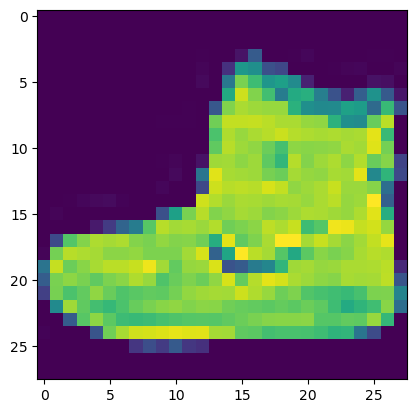

In [151]:
plt.imshow(train_image[0]) 

In [152]:
train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [153]:
np.max(train_image[0]), np.min(train_image[0])

(255, 0)

用0，1，2，3...代表分类

In [154]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

归一化,这样train_image和test_image的值都是[0,1]的了，就可以进行分类了

In [155]:
train_image = train_image/255
test_image = test_image/255

In [156]:
train_image.shape

(60000, 28, 28)

dense只能把一个张量为一维的数据映射到另一个张量一维的数据

使用Flatten将二维数据扁平为一维数据，将28 * 28的二维变量，扁平成为28 * 28长度的向量

Dense(128,))-->Dense的单元层数太小会损失一些数据，Dense的单元层数太大会产生过拟合

关键在于最后10个单元层使用softmax进行激活。将这10个输出变为概率分布，这十个输出概率的和为1

In [30]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) # 28 * 28
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [31]:
model.compile(optimizer = 'adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc']
             )

训练

In [32]:
model.fit(train_image, train_label, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5076 - acc: 0.8238
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3798 - acc: 0.8641
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3414 - acc: 0.8757
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3154 - acc: 0.8850
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2997 - acc: 0.8890


测试准确率

In [33]:
model.evaluate(test_image, test_label)

313/313 [==============================] - 0s 959us/step - loss: 0.3489 - acc: 0.8743


[0.3488607108592987, 0.8743000030517578]

In [160]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

beijing [1,0,0]   shanghai [0,1,0]   shenzhen [0,0,1]

创建train_label的one_hot编码

In [161]:
train_label_onehot = tf.keras.utils.to_categorical(train_label)

In [162]:
train_label_onehot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [163]:
train_label_onehot[-1]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

创建test_label的one_hot编码

In [164]:
test_label_onehot = tf.keras.utils.to_categorical(test_label)

In [165]:
test_label_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

训练配置

In [60]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) # 28 * 28
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [61]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


编译---》 优化方式，损失值，正确率

In [42]:
model.compile(optimizer = 'adam',
             loss='categorical_crossentropy',
             metrics=['acc']
             )

训练

In [43]:
model.fit(train_image, train_label_onehot, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4924 - acc: 0.8270
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3747 - acc: 0.8646
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3350 - acc: 0.8780
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3117 - acc: 0.8864
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2960 - acc: 0.8894


正确率测试

In [44]:
model.evaluate(test_image, test_label_onehot)

313/313 [==============================] - 0s 914us/step - loss: 0.3402 - acc: 0.8794


[0.3402041792869568, 0.8794000148773193]

In [45]:
predict = model.predict(test_image)

313/313 [==============================] - 0s 980us/step


In [46]:
test_image.shape

(10000, 28, 28)

In [48]:
predict.shape

(10000, 10)

In [49]:
predict[0]

array([1.0544438e-06, 6.1230937e-10, 1.2780465e-07, 7.0104638e-09,
       4.0817454e-07, 5.5778935e-03, 1.3825299e-06, 1.6263897e-02,
       4.1647227e-06, 9.7815108e-01], dtype=float32)

In [50]:
np.argmax(predict[0])

9

In [51]:
test_label[0]

9

将学习速率从0.001变为0.01----》shift+Tab键可以看默认参数

更改学习速率使得效果变差

In [53]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
             loss='categorical_crossentropy',
             metrics=['acc']
             )

In [54]:
model.fit(train_image, train_label_onehot, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4813 - acc: 0.8304
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4267 - acc: 0.8481
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4078 - acc: 0.8555
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4039 - acc: 0.8564
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3925 - acc: 0.8605


In [55]:
model.evaluate(test_image, test_label_onehot)

313/313 [==============================] - 0s 975us/step - loss: 0.4835 - acc: 0.8321


[0.4834999442100525, 0.832099974155426]

# 增加几个隐藏层来提高网络的拟合能力

In [92]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) # 28 * 28
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

可训练参数个数：13万个

In [93]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 128)               16512     
                                                                 
 dense_20 (Dense)            (None, 128)               16512     
                                                                 
 dense_21 (Dense)            (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [94]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
             loss='categorical_crossentropy',
             metrics=['acc']
             )

In [95]:
model.fit(train_image, train_label_onehot, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4852 - acc: 0.8233
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3651 - acc: 0.8660
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3289 - acc: 0.8786
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3082 - acc: 0.8853
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2907 - acc: 0.8912
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2746 - acc: 0.8962
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2643 - acc: 0.9002
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2571 - acc: 0.9020
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2428 - acc: 0.9078
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2365 - acc: 0.9096


In [122]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) # 28 * 28
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [116]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
             loss='categorical_crossentropy',
             metrics=['acc']
             )

使用history记录训练过程，validation_data=(test_image, test_label_onehot))---》在test上的正确率情况以及loss变化情况

在训练中就会提示在训练过程中在test上的正确率情况和loss变化情况

In [117]:
history = model.fit(train_image, train_label_onehot, 
                    epochs = 10,
                    validation_data=(test_image, test_label_onehot))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4858 - acc: 0.8248 - val_loss: 0.4711 - val_acc: 0.8270
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3670 - acc: 0.8660 - val_loss: 0.4022 - val_acc: 0.8542
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3341 - acc: 0.8776 - val_loss: 0.4149 - val_acc: 0.8528
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3108 - acc: 0.8836 - val_loss: 0.3508 - val_acc: 0.8733
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2936 - acc: 0.8909 - val_loss: 0.3410 - val_acc: 0.8793
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2795 - acc: 0.8964 - val_loss: 0.3267 - val_acc: 0.8839
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2654 - acc: 0.8997 - val_loss: 0.3370 - val_acc: 0.8800
Epoch 8/10
1875/1875 [==============================] - 7s 4ms

看一下keys所记录的变化有哪些

In [118]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

用绘图看一下在train数据上的loss，和在test上的loss

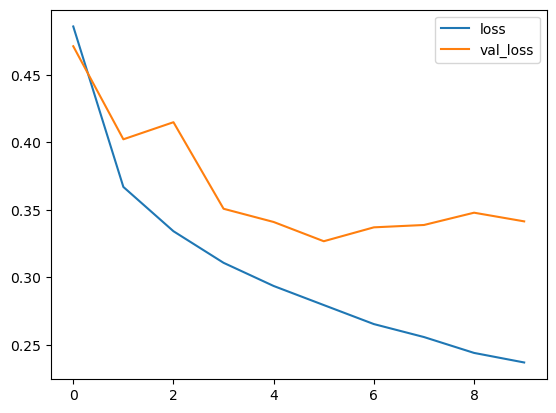

In [119]:
plt.plot(history.epoch, history.history.get('loss'), label = 'loss')
plt.plot(history.epoch, history.history.get('val_loss'), label = 'val_loss')
plt.legend()

为什么train数据的loss一直下降，而test的loss数据却没有一直下降，反而上升了呢，这就是一个过拟合的现象，在test上产生过拟合

从正确率上也可以看到这个现象，在train数据上得分特别高，在test上得分没有那么高

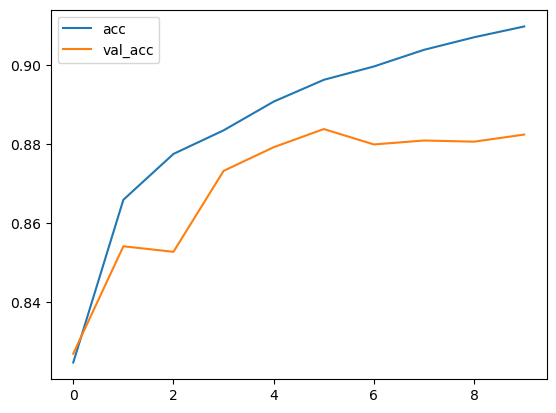

In [121]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()

过拟合：在训练数据上得分很高，在测试数据上得分比较低

欠拟合：在训练数据上得分比较低，在测试数据上得分相对比较低

# 如何在网络中添加dropout层

0.5表示舍弃的比率，添加三个更加准确

In [128]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) # 28 * 28
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [129]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 128)               100480    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_35 (Dense)            (None, 128)               16512     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_36 (Dense)            (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)             

In [125]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
             loss='categorical_crossentropy',
             metrics=['acc']
             )

重新训练下

In [126]:
history = model.fit(train_image, train_label_onehot, 
                    epochs = 10,
                    validation_data=(test_image, test_label_onehot))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8918 - acc: 0.6686 - val_loss: 0.5601 - val_acc: 0.7782
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6233 - acc: 0.7766 - val_loss: 0.4814 - val_acc: 0.8204
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5782 - acc: 0.7957 - val_loss: 0.4707 - val_acc: 0.8361
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5459 - acc: 0.8073 - val_loss: 0.4515 - val_acc: 0.8379
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5313 - acc: 0.8141 - val_loss: 0.4380 - val_acc: 0.8389
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5216 - acc: 0.8187 - val_loss: 0.4316 - val_acc: 0.8470
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5116 - acc: 0.8195 - val_loss: 0.4257 - val_acc: 0.8489
Epoch 8/10
1875/1875 [==============================] - 7s 3ms

In [130]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

损失值的变化

从数据上看，首先没有过拟合，因为loss比val_loss的正确率要高

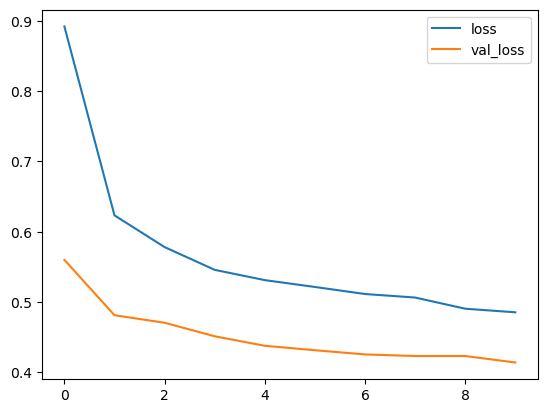

In [133]:
plt.plot(history.epoch, history.history.get('loss'), label = 'loss')
plt.plot(history.epoch, history.history.get('val_loss'), label = 'val_loss')
plt.legend()

再看正确率

从数据上看，首先没有过拟合，因为val_acc比acc的正确率要高

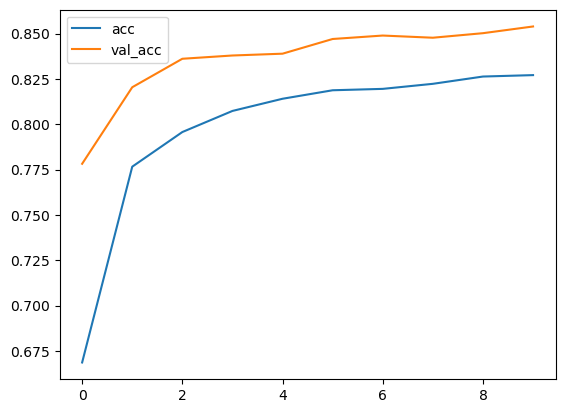

In [134]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()

第二个避免过拟合更好的方法是减少网络的容量，使用较少的隐藏单元，可以迫使网络学习更加关键的数据

In [166]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [167]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
             loss='categorical_crossentropy',
             metrics=['acc']
             )

In [168]:
history = model.fit(train_image, train_label_onehot,
         epochs = 10,
         validation_data = (test_image, test_label_onehot)
         )

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5584 - acc: 0.8077 - val_loss: 0.4570 - val_acc: 0.8391
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4199 - acc: 0.8523 - val_loss: 0.4717 - val_acc: 0.8333
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3835 - acc: 0.8642 - val_loss: 0.4123 - val_acc: 0.8531
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3623 - acc: 0.8692 - val_loss: 0.3843 - val_acc: 0.8638
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3450 - acc: 0.8762 - val_loss: 0.3781 - val_acc: 0.8662
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3306 - acc: 0.8806 - val_loss: 0.3879 - val_acc: 0.8644
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3221 - acc: 0.8845 - val_loss: 0.3802 - val_acc: 0.8602
Epoch 8/10
1875/1875 [==============================] - 3s 2ms

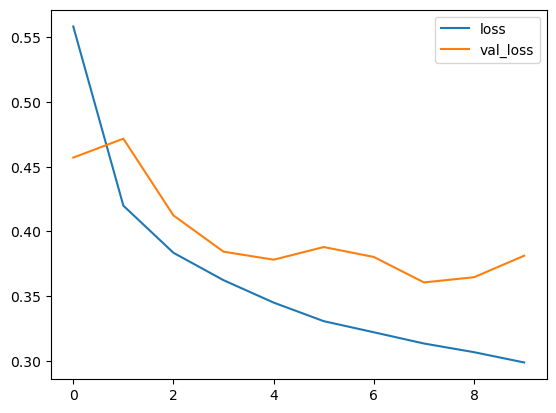

In [169]:
plt.plot(history.epoch, history.history.get('loss'), label = 'loss')
plt.plot(history.epoch, history.history.get('val_loss'), label = 'val_loss')
plt.legend()

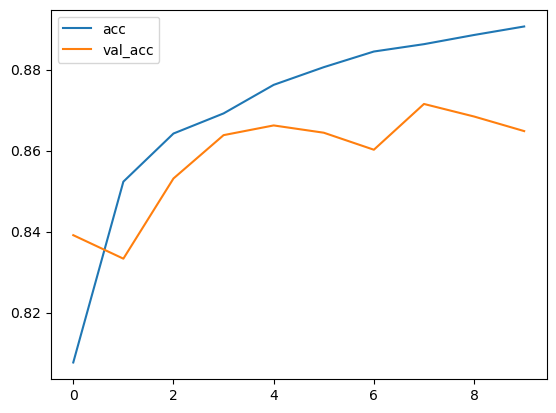

In [170]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()

此时正确率正在上升